In [47]:
import networkx as nx
import pandas as pd
#pd.set_option('max_rows', 400)
import matplotlib.pyplot as plt

In [48]:
tennis_df = pd.read_csv("https://raw.githubusercontent.com/Dieg0Dev/datasets/main/atp_tennis.csv")

In [49]:
tennis_df['Date'] = pd.to_datetime(tennis_df['Date'], errors='coerce')

In [50]:
grand_slams = tennis_df[tennis_df['Series'] == 'Grand Slam']
australian_open = tennis_df[tennis_df['Tournament'] == 'Australian Open']
french_open = tennis_df[tennis_df['Tournament'] == 'French Open']
wimbledon = tennis_df[tennis_df['Tournament'] == 'Wimbledon']
us_open = tennis_df[tennis_df['Tournament'] == 'US Open']

In [51]:
torneio = australian_open
year = 2023

In [52]:
torneio = torneio[torneio['Date'].dt.year == year]
torneio

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
59060,Australian Open,2023-01-16,Grand Slam,Outdoor,Hard,1st Round,5,Moutet C.,Wu Y.,Moutet C.,62,114,790,494,2.38,1.57,6-4 5-7 6-2 4-6 7-5
59061,Australian Open,2023-01-16,Grand Slam,Outdoor,Hard,1st Round,5,Rinderknech A.,Watanuki Y.,Watanuki Y.,59,138,807,413,1.62,2.30,3-6 3-6 2-6
59062,Australian Open,2023-01-16,Grand Slam,Outdoor,Hard,1st Round,5,Van De Zandschulp B.,Ivashka I.,Van De Zandschulp B.,34,73,1205,705,1.36,3.20,6-3 3-6 7-5 6-3
59063,Australian Open,2023-01-16,Grand Slam,Outdoor,Hard,1st Round,5,Barrere G.,Etcheverry T.,Etcheverry T.,83,79,635,649,1.62,2.30,6-3 3-6 4-6 4-6
59064,Australian Open,2023-01-16,Grand Slam,Outdoor,Hard,1st Round,5,Sinner J.,Edmund K.,Sinner J.,16,581,2375,52,1.06,10.00,6-4 6-0 6-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59179,Australian Open,2023-01-25,Grand Slam,Outdoor,Hard,Quarterfinals,5,Shelton B.,Paul T.,Paul T.,89,35,604,1160,3.40,1.33,6-7 3-6 7-5 4-6
59180,Australian Open,2023-01-25,Grand Slam,Outdoor,Hard,Quarterfinals,5,Djokovic N.,Rublev A.,Djokovic N.,5,6,5070,3930,1.11,6.50,6-1 6-2 6-4
59181,Australian Open,2023-01-27,Grand Slam,Outdoor,Hard,Semifinals,5,Khachanov K.,Tsitsipas S.,Tsitsipas S.,20,4,1885,5715,3.50,1.30,6-7 4-6 7-6 3-6
59182,Australian Open,2023-01-27,Grand Slam,Outdoor,Hard,Semifinals,5,Djokovic N.,Paul T.,Djokovic N.,5,35,5070,1160,1.05,11.00,7-5 6-1 6-2


In [53]:
G = nx.DiGraph()

for index, row in torneio.iterrows():
    player1 = row['Player_1']
    player2 = row['Player_2']
    winner = row['Winner']
    
    if player1 == winner: 
        G.add_edge(player1, player2)
    else:
        G.add_edge(player2, player1)

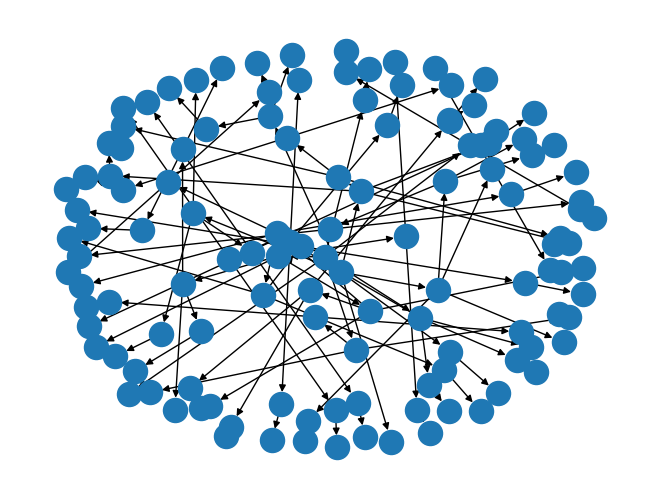

In [54]:
nx.draw(G)

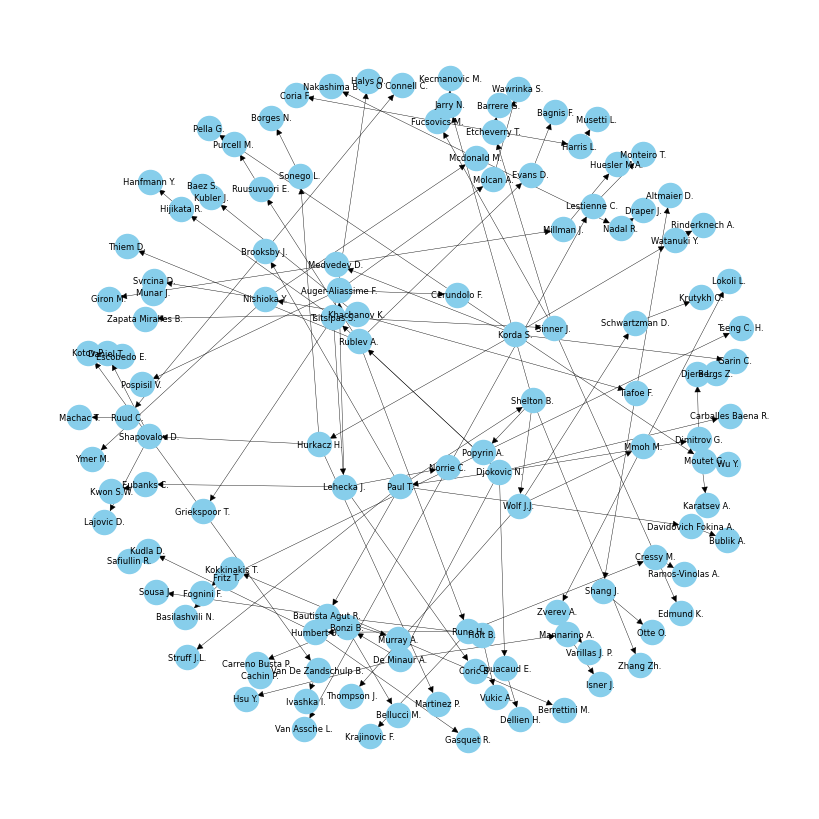

In [55]:
plt.figure(figsize=(8,8))
nx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=6)

In [56]:
from pyvis.network import Network

In [63]:
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", directed=True)

net.from_nx(G)

net.show_buttons(filter_=['nodes', 'edges', 'physics'])
net.write_html('example.html')
with open('example.html', 'r', encoding='utf-8') as f:
    html_content = f.read()

display(HTML(html_content))